## Paquetes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Urilizar esto si se instaló tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow import keras

# # Utilizar esto si se instaló Keras
# from keras.models import Sequential
# from keras import layers
# from keras.datasets import mnist
# import keras

## Problema

Crear un autoencoder capaz de reducir el ruido de una imagen de entrada

### Imagenes con Ruido

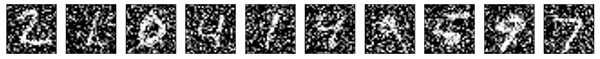

Para esto, se utilizará el dataset de imagenes de número escritos a mano MNIST

In [2]:
# Obtener data
(x_train, _), (x_test, _) = mnist.load_data()

# Escalar data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Preprocesamiento final
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

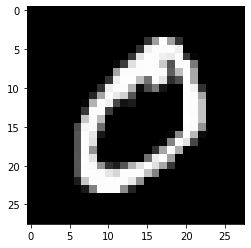

In [5]:
plt.imshow(x_train[1], cmap='gray')

Sin embargo, estos datos no contiene rudio, por lo que es necesario aplicarles ruido manualmente

In [6]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

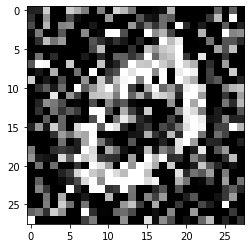

In [7]:
plt.imshow(x_train_noisy[1], cmap='gray')

Aqui podremos ver unos ejemplos del dataset con y sin ruido

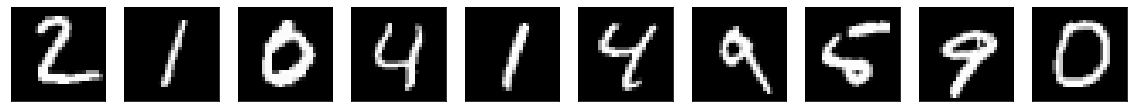

In [9]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

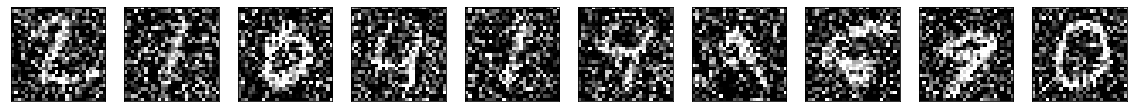

In [8]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Ahora, procederemos a crear un modelo con el framework Keras

Vamos a crear un red con (Conv(32) + MaxPooling(2)) x2 + (Conv(32) + UpSampling(2)) x2 + Conv(1)

In [12]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# En este punto, la representación de los datos es del shape (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [15]:
autoencoder = keras.Model(input_img, decoded)

Luego, por último, debemos compilar nuestro modelo, seleccionando la función a optimizar, la función optimizadora y las métricas a visualizar.

In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Listo. Ahora solo necesitamos entrenar nuestro modelo con la función "fit".

In [19]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/20
469/469 [==============================] - 91s 195ms/step - loss: 0.1053 - val_loss: 0.1032
Epoch 2/20
469/469 [==============================] - 94s 201ms/step - loss: 0.1035 - val_loss: 0.1031
Epoch 3/20
469/469 [==============================] - 96s 204ms/step - loss: 0.1021 - val_loss: 0.1005
Epoch 4/20
469/469 [==============================] - 94s 201ms/step - loss: 0.1010 - val_loss: 0.0997
Epoch 5/20
469/469 [==============================] - 96s 204ms/step - loss: 0.1001 - val_loss: 0.0988
Epoch 6/20
469/469 [==============================] - 94s 200ms/step - loss: 0.0994 - val_loss: 0.0982
Epoch 7/20
469/469 [==============================] - 94s 201ms/step - loss: 0.0988 - val_loss: 0.0977
Epoch 8/20
469/469 [==============================] - 94s 201ms/step - loss: 0.0983 - val_loss: 0.0976
Epoch 9/20
469/469 [==============================] - 96s 204ms/step - loss: 0.0980 - val_loss: 0.0973
Epoch 10/20
469/469 [==============================] - 95s 203ms/step - l

Veamos visualmente los resultados

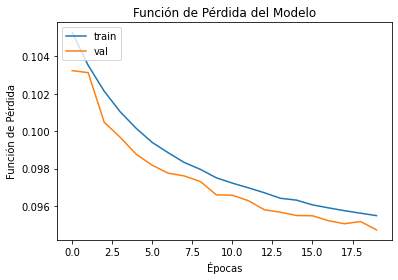

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Función de Pérdida del Modelo')
plt.ylabel('Función de Pérdida')
plt.xlabel('Épocas')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Resultados

In [22]:
y_pred = autoencoder.predict(x_test_noisy)

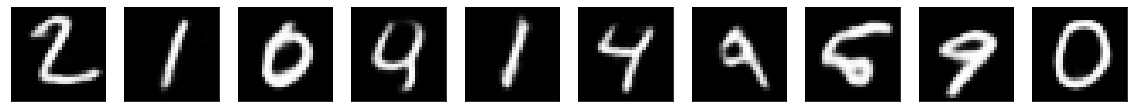

In [23]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(y_pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()